In [1]:
#Import Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
from sklearn.cluster import KMeans
from sklearn import preprocessing
import datetime as dt
from statistics import median
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
from math import pi
from scipy.spatial.distance import cdist
from IPython.display import display, HTML

style.use('ggplot')

df20 = pd.read_csv('players_20.csv')
df19 = pd.read_csv('players_19.csv')
df18 = pd.read_csv('players_18.csv')
df17 = pd.read_csv('players_17.csv')
df16 = pd.read_csv('players_16.csv')
df15 = pd.read_csv('players_15.csv')

In [2]:
#Dream Team in FIFA 20 to play with 4-3-3 and 3-5-2
df20['best_position'] = df20['player_positions'].str.split(',').str[0]
df19['best_position'] = df19['player_positions'].str.split(',').str[0]
df18['best_position'] = df18['player_positions'].str.split(',').str[0]
df17['best_position'] = df17['player_positions'].str.split(',').str[0]
df16['best_position'] = df16['player_positions'].str.split(',').str[0]
df15['best_position'] = df15['player_positions'].str.split(',').str[0]

def get_best_squad(df_name, position):
    df_copy = df_name.copy()
    store = []
    for i in position:
        store.append([i,df_copy.loc[[df_copy[df_copy['best_position'] == i]['overall'].idxmax()]]['short_name'].to_string(index = False), df_copy[df_copy['best_position'] == i]['overall'].max()])
        df_copy.drop(df_copy[df_copy['best_position'] == i]['overall'].idxmax(), inplace = True)
    #return store
    return pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

# 4-3-3
squad_433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
print ('4-3-3 in FIFA 20')
print (get_best_squad(df20, squad_433))
print ('\n4-3-3 in FIFA 19')
print (get_best_squad(df19, squad_433))
print ('\n4-3-3 in FIFA 18')
print (get_best_squad(df18, squad_433))
print ('\n4-3-3 in FIFA 17')
print (get_best_squad(df17, squad_433))
print ('\n4-3-3 in FIFA 16')
print (get_best_squad(df16, squad_433))
print ('\n4-3-3 in FIFA 15')
print (get_best_squad(df15, squad_433))

# 3-5-2
squad_352 = ['GK', 'LWB', 'CB', 'RWB', 'LM', 'CDM', 'CAM', 'CM', 'RM', 'LW', 'RW']
print ('3-5-2 in FIFA 20')
print (get_best_squad(df20, squad_352))
print ('\n3-5-2 in FIFA 19')
print (get_best_squad(df19, squad_352))
print ('\n3-5-2 in FIFA 18')
print (get_best_squad(df18, squad_352))
print ('\n3-5-2 in FIFA 17')
print (get_best_squad(df17, squad_352))
print ('\n3-5-2 in FIFA 16')
print (get_best_squad(df16, squad_352))
print ('\n3-5-2 in FIFA 15')
print (get_best_squad(df15, squad_352))

4-3-3 in FIFA 20
Position              Player Overall
      GK            J. Oblak      91
      LB          Jordi Alba      87
      CB         V. van Dijk      90
      CB        K. Koulibaly      89
      RB          J. Kimmich      86
      LM            K. Coman      84
     CDM            N. Kanté      89
      RM                Koke      85
      LW           Neymar Jr      92
      ST   Cristiano Ronaldo      93
      RW            L. Messi      94

4-3-3 in FIFA 19
Position              Player Overall
      GK              De Gea      91
      LB             Marcelo      88
      CB        Sergio Ramos      91
      CB            D. Godín      90
      RB          J. Kimmich      85
      LM          I. Perišić      86
     CDM            N. Kanté      89
      RM           A. Robben      85
      LW           Neymar Jr      92
      ST   Cristiano Ronaldo      94
      RW            M. Salah      88

4-3-3 in FIFA 18
Position              Player Overall
      GK            M.

In [3]:
# Man Utd squad with the best players (Overall and Potential attributes)
df20['value_million_eur'] = pd.to_numeric(df20['value_eur'], errors='coerce') / 1000000
df19['value_million_eur'] = pd.to_numeric(df19['value_eur'], errors='coerce') / 1000000
df18['value_million_eur'] = pd.to_numeric(df18['value_eur'], errors='coerce') / 1000000
df17['value_million_eur'] = pd.to_numeric(df17['value_eur'], errors='coerce') / 1000000
df16['value_million_eur'] = pd.to_numeric(df16['value_eur'], errors='coerce') / 1000000
df15['value_million_eur'] = pd.to_numeric(df15['value_eur'], errors='coerce') / 1000000

def get_best_squad(df_name, position, club = '*', measurement = 'overall'):
    df_copy = df_name.copy()
    df_copy = df_copy[df_copy['club'] == club]
    store = []
    for i in position:
        store.append([df_copy.loc[[df_copy[df_copy['best_position'].str.contains(i)][measurement].idxmax()]]['best_position'].to_string(index = False),df_copy.loc[[df_copy[df_copy['best_position'].str.contains(i)][measurement].idxmax()]]['short_name'].to_string(index = False), df_copy[df_copy['best_position'].str.contains(i)][measurement].max(), float(df_copy.loc[[df_copy[df_copy['best_position'].str.contains(i)][measurement].idxmax()]]['value_million_eur'].to_string(index = False))])
        df_copy.drop(df_copy[df_copy['best_position'].str.contains(i)][measurement].idxmax(), inplace = True)
    return np.mean([x[2] for x in store]).round(1), pd.DataFrame(np.array(store).reshape(11,4), columns = ['Position', 'Player', measurement, 'Value (M)']).to_string(index = False), np.sum([x[3] for x in store]).round(1)

# easier constraint
squad_433_adj = ['GK', 'B$', 'B$', 'B$', 'B$', 'M$', 'M$', 'M$', 'W$|T$', 'W$|T$', 'W$|T$']

# Example Output for ManUtd
rating_433_ManUtd_Overall, best_list_433_ManUtd_Overall, value_433_ManUtd_Overall = get_best_squad(df20, squad_433_adj, 'Manchester United', 'overall')
rating_433_ManUtd_Potential, best_list_433_ManUtd_Potential, value_433_ManUtd_Potential  = get_best_squad(df20, squad_433_adj, 'Manchester United', 'potential')
print('FIFA 20 - Manchester United\n')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ManUtd_Overall))
print('Total Value (M): {:.1f}'.format(value_433_ManUtd_Overall))
print(best_list_433_ManUtd_Overall)
print('\n-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ManUtd_Potential))
print('Total Value (M): {:.1f}'.format(value_433_ManUtd_Potential))
print(best_list_433_ManUtd_Potential)

FIFA 20 - Manchester United

-Overall-
Average rating: 83.0
Total Value (M): 344.5
Position        Player overall Value (M)
      GK        De Gea      89      56.0
      CB    H. Maguire      82      23.0
      CB   V. Lindelöf      81      22.0
      LB       L. Shaw      81      20.0
      CB     E. Bailly      80      16.5
      CM      P. Pogba      88      72.5
     CAM     Juan Mata      82      19.5
     CAM    J. Lingard      82      24.0
      LW    A. Martial      83      34.5
      ST   M. Rashford      83      35.5
      LW    A. Sánchez      82      21.0

-Potential-
Average rating: 86.7
Total Value (M): 282.5
Position           Player potential Value (M)
      GK           De Gea        90      56.0
      RB   A. Wan-Bissaka        88      17.5
      CB      V. Lindelöf        87      22.0
      RB      Diogo Dalot        85      10.0
      LB          L. Shaw        84      20.0
      CM         P. Pogba        91      72.5
     CAM         A. Gomes        86       1.8


In [4]:
#Top 20 FIFA players from the version 15 to FIFA 20
def get_top20_players(df_name):
    df_copy = df_name.sort_values(['overall', 'potential'], ascending=[False, False]).head(20)
    store = []
    for index, row in df_copy.iterrows():
        store.append([row['best_position'], row['short_name'], row['overall'], row['potential'], row['age']])
    return np.mean([x[2] for x in store]).round(1), np.mean([x[3] for x in store]).round(1), np.mean([x[4] for x in store]).round(1), pd.DataFrame(np.array(store).reshape(20, 5), columns = ['Position', 'Player', 'Overall', 'Potential', 'Age']).to_string(index = False)

top20_players20_overall, top20_players20_potential, top20_players20_age, top20_players20 = get_top20_players(df20)
print('FIFA 20 - Top 20 Players')
print('Average overall: {:.1f}'.format(top20_players20_overall))
print('Average potential: {:.1f}'.format(top20_players20_potential))
print('Average age: {:.1f}'.format(top20_players20_age))
print(top20_players20)

top20_players19_overall, top20_players19_potential, top20_players19_age, top20_players19 = get_top20_players(df19)
print('\nFIFA 19 - Top 20 Players')
print('Average overall: {:.1f}'.format(top20_players19_overall))
print('Average potential: {:.1f}'.format(top20_players19_potential))
print('Average age: {:.1f}'.format(top20_players19_age))
print(top20_players19)

top20_players18_overall, top20_players18_potential, top20_players18_age, top20_players18 = get_top20_players(df18)
print('\nFIFA 18 - Top 20 Players')
print('Average overall: {:.1f}'.format(top20_players18_overall))
print('Average potential: {:.1f}'.format(top20_players18_potential))
print('Average age: {:.1f}'.format(top20_players18_age))
print(top20_players18)

top20_players17_overall, top20_players17_potential, top20_players17_age, top20_players17 = get_top20_players(df17)
print('\nFIFA 17 - Top 20 Players')
print('Average overall: {:.1f}'.format(top20_players17_overall))
print('Average potential: {:.1f}'.format(top20_players17_potential))
print('Average age: {:.1f}'.format(top20_players17_age))
print(top20_players17)

top20_players16_overall, top20_players16_potential, top20_players16_age, top20_players16 = get_top20_players(df16)
print('\nFIFA 16 - Top 20 Players')
print('Average overall: {:.1f}'.format(top20_players16_overall))
print('Average potential: {:.1f}'.format(top20_players16_potential))
print('Average age: {:.1f}'.format(top20_players16_age))
print(top20_players16)

top20_players15_overall, top20_players15_potential, top20_players15_age, top20_players15 = get_top20_players(df15)
print('\nFIFA 15 - Top 20 Players')
print('Average overall: {:.1f}'.format(top20_players15_overall))
print('Average potential: {:.1f}'.format(top20_players15_potential))
print('Average age: {:.1f}'.format(top20_players15_age))
print(top20_players15)

FIFA 20 - Top 20 Players
Average overall: 90.1
Average potential: 91.1
Average age: 28.7
Position             Player Overall Potential Age
      RW           L. Messi      94        94  32
      ST  Cristiano Ronaldo      93        93  34
      LW          Neymar Jr      92        92  27
      GK           J. Oblak      91        93  26
      LW          E. Hazard      91        91  28
     CAM       K. De Bruyne      91        91  28
      GK      M. ter Stegen      90        93  27
      CB        V. van Dijk      90        91  27
      CM          L. Modrić      90        90  33
      RW           M. Salah      90        90  27
      ST          K. Mbappé      89        95  20
      CB       K. Koulibaly      89        91  28
      ST            H. Kane      89        91  25
      GK            Alisson      89        91  26
      GK             De Gea      89        90  28
     CDM           N. Kanté      89        90  28
      CB       G. Chiellini      89        89  34
      ST   

Text(0.5, 1.0, 'FIFA 20 - Top 5 Players Historical Overall Rating')

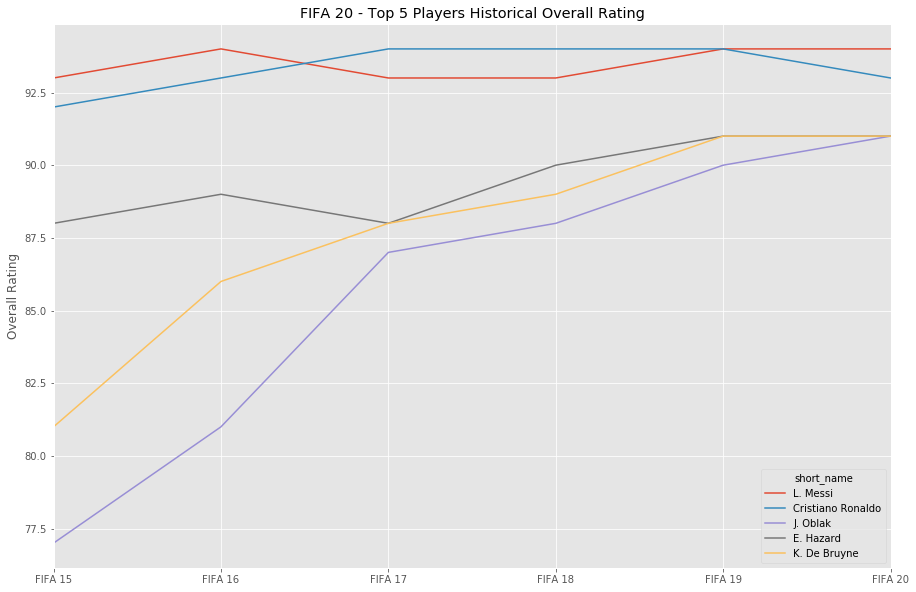

In [5]:
# Top 20 Players
top20_players20_list = df20.sort_values(['overall', 'potential'], ascending=[False, False]).head(6)['long_name'].tolist()
filtered_players20 = df20[df20['long_name'].isin(top20_players20_list)][['short_name', 'overall', 'potential']]
filtered_players20.columns = ['short_name', 'overall20', 'potential20']
filtered_players20.set_index('short_name', inplace=True)
filtered_players19 = df19[df19['long_name'].isin(top20_players20_list)][['short_name', 'overall', 'potential']]
filtered_players19.columns = ['short_name', 'overall19', 'potential19']
filtered_players19.set_index('short_name', inplace=True)
filtered_players18 = df18[df18['long_name'].isin(top20_players20_list)][['short_name', 'overall', 'potential']]
filtered_players18.columns = ['short_name', 'overall18', 'potential18']
filtered_players18.set_index('short_name', inplace=True)
top20_players20_list = [item.replace('Kylian Mbappé', 'Kylian Mbappe Lottin') for item in top20_players20_list] #Mbappe had a different name in FIFA 17
filtered_players17 = df17[df17['long_name'].isin(top20_players20_list)][['short_name', 'overall', 'potential']]
filtered_players17.at[3899, 'short_name'] = 'Kylian Mbappé'
filtered_players17.columns = ['short_name', 'overall17', 'potential17']
filtered_players17.set_index('short_name', inplace=True)
filtered_players16 = df16[df16['long_name'].isin(top20_players20_list)][['short_name', 'overall', 'potential']] #VVD was not included in the sofifa database as of 21.09.2015 (not anymore in Celtic, not yet in Southamption)
filtered_players16.columns = ['short_name', 'overall16', 'potential16']
filtered_players16.set_index('short_name', inplace=True)
filtered_players15 = df15[df15['long_name'].isin(top20_players20_list)][['short_name', 'overall', 'potential']]
filtered_players15.columns = ['short_name', 'overall15', 'potential15']
filtered_players15.set_index('short_name', inplace=True)

dfs = [filtered_players20, filtered_players19, filtered_players18, filtered_players17, filtered_players16, filtered_players15]
merged_df = reduce(lambda left,right: pd.merge(left, right, on='short_name'), dfs)
overall_df = merged_df[['overall20', 'overall19', 'overall18', 'overall17', 'overall16', 'overall15']]
overall_df.columns = ['FIFA 20', 'FIFA 19', 'FIFA 18', 'FIFA 17', 'FIFA 16', 'FIFA 15']
potential_df = merged_df[['potential20', 'potential19', 'potential18', 'potential17', 'potential16', 'potential15']]
potential_df.columns = ['FIFA 20', 'FIFA 19', 'FIFA 18', 'FIFA 17', 'FIFA 16', 'FIFA 15']

#Trend line of Top 20 players Overall Rating
transposed_overall_df = overall_df.T.sort_index(ascending=True)
plt.rcParams["figure.figsize"] = [15, 10]
ax = transposed_overall_df.plot()
ax.set_ylabel('Overall Rating')
ax.set_title('FIFA 20 - Top 5 Players Historical Overall Rating')

Text(0.5, 1.0, 'FIFA 20 - Top 5 Players Historical Potential Rating')

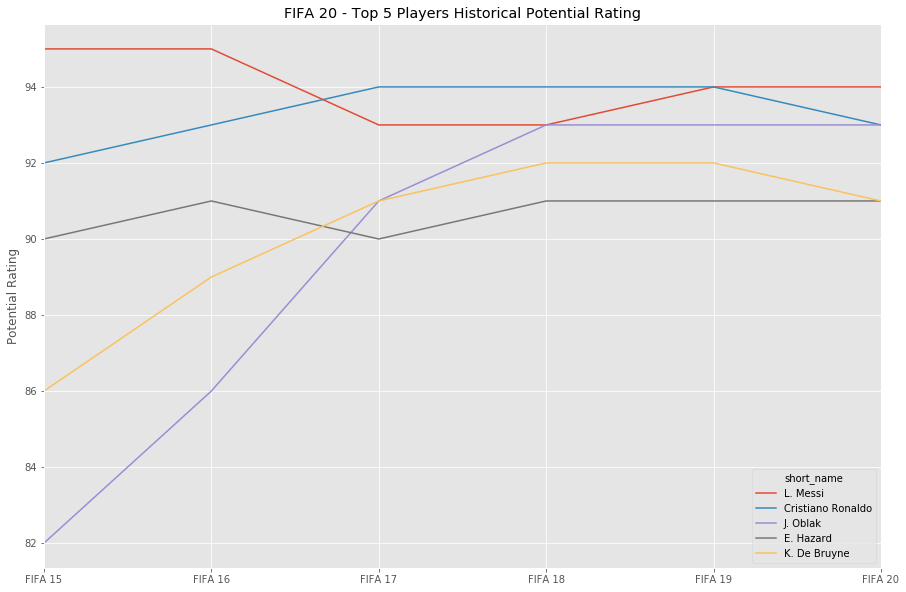

In [6]:
#Trend line of Top 20 players Potential Rating
transposed_potential_df = potential_df.T.sort_index(ascending=True)
plt.rcParams["figure.figsize"] = [15, 10]
ax = transposed_potential_df.plot()
ax.set_ylabel('Potential Rating')
ax.set_title('FIFA 20 - Top 5 Players Historical Potential Rating')

In [7]:
#Extracting the player's best position of playing
df20['best_pos'] = df20['player_positions'].str.split(',').str[0]
df_player = df20[df20['best_pos']!= 'GK'].copy()

dct_pos = {
    'ST': 'Fwd_Centre',
    'CF': 'Fwd_Centre',
    'LW': 'Fwd_Winger',
    'RW': 'Fwd_Winger',
    'CM': 'Mid_Centre',
    'CAM': 'Mid_Centre',
    'CDM': 'Mid_Centre',
    'LM': 'Mid_Side',
    'RM': 'Mid_Side',
    'CB': 'Back_Centre',
    'LB': 'Back_Side',
    'RB': 'Back_Side',
    'LWB': 'Back_Winger',
    'RWB': 'Back_Winger',
}

df_player['best_pos'] = df_player['best_pos'].map(dct_pos)

s = ['Back_Centre',
 'Back_Side',
 'Back_Winger',
 'Mid_Centre',
 'Mid_Side',
 'Fwd_Centre',
 'Fwd_Winger']

Text(0.5, 1, 'Neural Net Classifier')

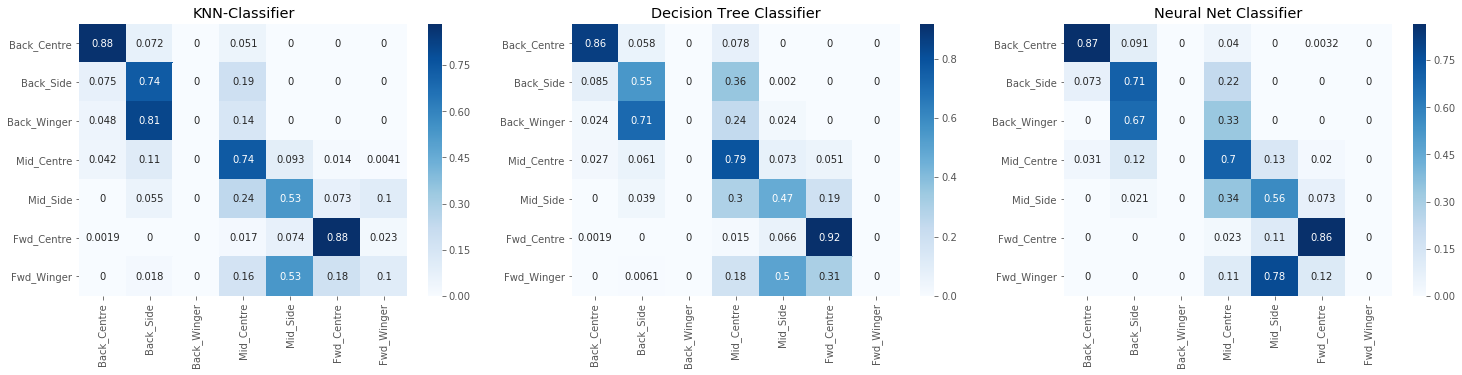

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

from sklearn.neural_network import MLPClassifier

def display_confusion_matrix(y, y_hat, label, axs):
    res = confusion_matrix(y, y_hat, labels = label)
    row_sums = res.astype(np.float).sum(axis=1)
    res = res/row_sums[:, np.newaxis]
    res = pd.DataFrame(res, columns = label, index = label)
    sns.heatmap(res, cmap="Blues", annot=True, ax=axs)

#pd.DataFrame(y_test).groupby('best_pos')['best_pos'].count()

cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
for col in cols:
    df_player.loc[:, 'n_'+col] = df_player[col] / df_player['overall']

req_col_basic = ['n_'+col for col in cols]

X = df_player[req_col_basic]
y = df_player['best_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

fig, ax = plt.subplots(ncols=3, figsize=(25,5))

#KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

display_confusion_matrix(y_test, classifier.predict(X_test), s, ax[0])

#Decision Tree Classifier
model = tree.DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

display_confusion_matrix(y_test, model.predict(X_test), s, ax[1])

#Neural Net Classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(7,7,7), 
                    activation='relu',random_state=1)
clf.fit(X_train, y_train)

display_confusion_matrix(y_test, clf.predict(X_test), s, ax[2])

ax[0].set_title('KNN-Classifier')
ax[1].set_title('Decision Tree Classifier')
ax[2].set_title('Neural Net Classifier')

Text(0.5, 1, 'Neural Net Classifier')

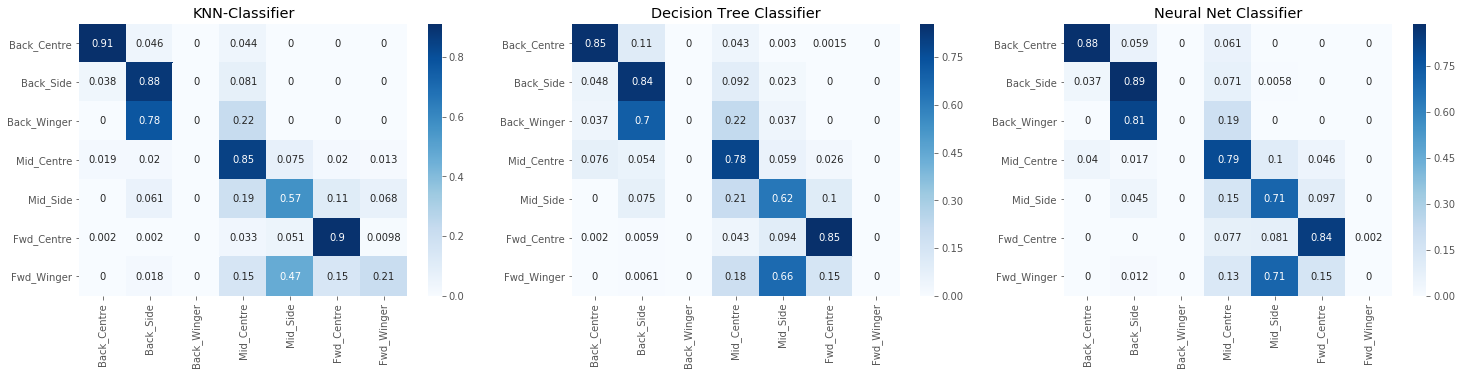

In [9]:
cols = ['attacking_crossing','attacking_finishing','attacking_heading_accuracy',
        'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
        'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration',
        'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
        'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots',
        'mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision',
        'mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle',
        'defending_sliding_tackle']

for col in cols:
    df_player['n_'+col] = df_player[col] / df_player['overall']

req_col_detail = ['n_'+col for col in cols]

X = df_player[req_col_detail]
y = df_player['best_pos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

fig, ax = plt.subplots(ncols=3, figsize=(25,5))

#KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

display_confusion_matrix(y_test, classifier.predict(X_test), s, ax[0])

#Decision Tree Classifier
model = tree.DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

display_confusion_matrix(y_test, model.predict(X_test), s, ax[1])

#Neural Net Classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(7,7,7), 
                    activation='relu',random_state=1)
clf.fit(X_train, y_train)

display_confusion_matrix(y_test, clf.predict(X_test), s, ax[2])

ax[0].set_title('KNN-Classifier')
ax[1].set_title('Decision Tree Classifier')
ax[2].set_title('Neural Net Classifier')

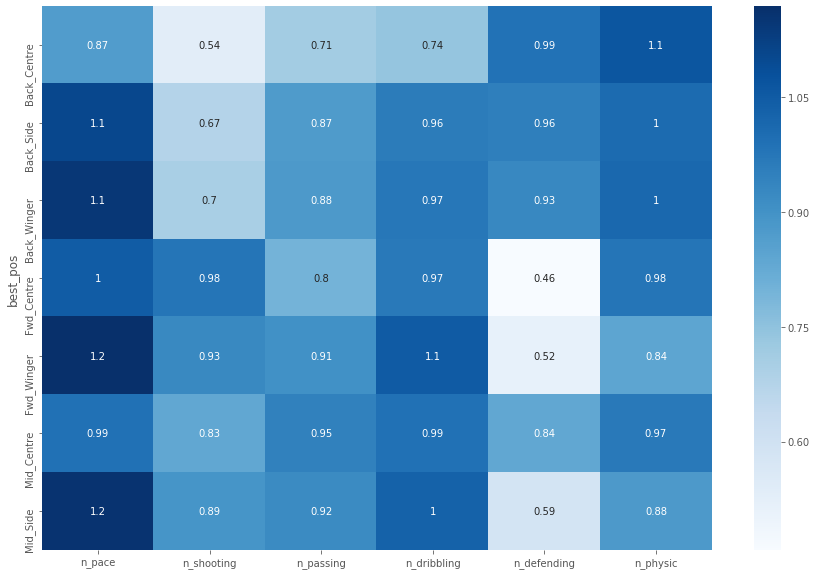

In [10]:
#Attributes needed for each position to excel in football
df_analysis = df_player[req_col_basic + ['best_pos']]
tmp = df_analysis.groupby('best_pos').mean()
sns.heatmap(tmp, cmap="Blues", annot=True)